In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.rcParams['figure.figsize']=[12,8]

matplotlib.rc('font',family='NanumGothic')
df_order=pd.read_csv("./log_order_sheet_001.csv")


/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  
/home/piai/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_order

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수령인 주소,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량
0,0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,71450,195파이 탕용기 소 300개 1set(2박스),1077,13600,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450,42602,False,False,True,1,300
1,1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42,19800,서울특별시 동대문구 한천로36길 16 (장안동),모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620,42930,False,False,True,2,2000
2,2,무통장입금,6820.0,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,13910,비닐봉투 배달중 중 백색 200개,1271,2900,세종특별자치시 호려울로 29 (보람동),모바일웹,20181230-0000100,2018-12-30 오후 3:15,NaN,기타,0,13910,42998,False,False,False,1,200
3,3,무통장입금,49500.0,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,81600,195파이 미니탕용기 투톤 300개 1set(2박스),1085,12630,부산광역시 부산진구 가야대로 482 (개금동),모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600,43063,False,False,True,1,300
4,4,무통장입금,61600.0,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,94710,250파이 원형 접시 미니 블랙 400개 1박스,1106,18000,부산광역시 해운대구 선수촌로 104-21 (반여동),모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,94710,43066,False,False,True,1,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46744,46744,카드,36300.0,교환안함,0,D-20171229-0000036-00,무료,2017-12-29 오후 4:32,2018-01-02 오전 5:31,0,52800,PP 4칸 도시락용기 A 200개 1박스,445.0,6340,서울특별시 서초구 강남대로97길 23 (잠원동),모바일웹,20171229-0000036,2017-12-29 오후 1:39,73987748@n,국민,0,52800,3170,False,False,True,1,200
46745,46745,카드,36300.0,교환안함,0,D-20171229-0000043-00,무료,2018-01-03 오전 9:45,2018-01-07 오전 5:38,0,112200,PP 6칸 도시락용기 02 200개 1박스,172.0,13460,경기도 의정부시 용민로 483 (민락동),모바일웹,20171229-0000043,2017-12-29 오후 5:16,chuheesuk,비씨,0,56100,3172,False,False,True,2,400
46746,46746,카드,22280.0,교환안함,300,D-20171230-0000022-01,무료,2018-01-02 오후 7:06,2018-01-11 오전 2:46,0,36000,"170mm 수저 투명 1,500개 1박스",140.0,3600,대전광역시 서구 관저2동,네이버 페이,20171230-0000022,2017-12-30 오후 6:56,NaN,기타,0,36000,3177,False,False,False,1,1500
46747,46747,카드,55000.0,교환안함,320,D-20171231-0000017-01,무료,2018-01-03 오후 2:00,2018-01-06 오후 6:06,0,73460,170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스),184.0,5140,광주광역시 서구 화운로 152 (화정동,네이버 페이,20171231-0000017,2017-12-31 오전 10:00,NaN,기타,0,73460,3178,False,False,False,1,400


In [3]:
df_order["주문경로"].value_counts()

PC쇼핑몰     25695
모바일웹      18531
네이버 페이    2523 
Name: 주문경로, dtype: int64

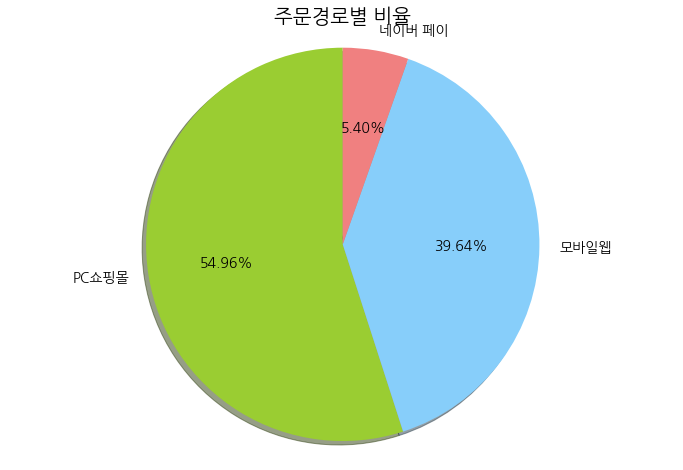

In [4]:
labels=['PC쇼핑몰','모바일웹','네이버 페이']
ratio=[25695,18531,2523]
group_colors=['yellowgreen','lightskyblue','lightcoral']
group_explodes=(0.1,0,0)
plt.pie(ratio,
        labels=labels,
        colors=group_colors,
        autopct='%1.2f%%',
        shadow=True,
        startangle=90,
       textprops={'fontsize':14})
plt.axis('equal')
plt.title('주문경로별 비율',fontsize=20)
plt.show()

In [5]:
df_order['주문일시(월별)']=df_order['주문일시'].str.slice(start=0,stop=7)


In [6]:
df_order.head(10)

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수령인 주소,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,주문일시(월별)
0,0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,71450,195파이 탕용기 소 300개 1set(2박스),1077,13600,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450,42602,False,False,True,1,300,2018-12
1,1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42,19800,서울특별시 동대문구 한천로36길 16 (장안동),모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620,42930,False,False,True,2,2000,2018-12
2,2,무통장입금,6820.0,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,13910,비닐봉투 배달중 중 백색 200개,1271,2900,세종특별자치시 호려울로 29 (보람동),모바일웹,20181230-0000100,2018-12-30 오후 3:15,NaN,기타,0,13910,42998,False,False,False,1,200,2018-12
3,3,무통장입금,49500.0,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,81600,195파이 미니탕용기 투톤 300개 1set(2박스),1085,12630,부산광역시 부산진구 가야대로 482 (개금동),모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600,43063,False,False,True,1,300,2018-12
4,4,무통장입금,61600.0,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,94710,250파이 원형 접시 미니 블랙 400개 1박스,1106,18000,부산광역시 해운대구 선수촌로 104-21 (반여동),모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,94710,43066,False,False,True,1,400,2018-12
5,5,무통장입금,42900.0,교환안함,0,D-20181231-0000108-01,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,75240,210파이 중화면용기 중 300개 1박스,1374,16430,부산광역시 해운대구 선수촌로 104-21 (반여동),모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,75240,43067,False,False,True,1,300,2018-12
6,6,무통장입금,51700.0,교환안함,0,D-20181231-0000184-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,82170,"105파이 다용도컵 세트 5호 대 370ml 블랙 PS-1,000개 1set(2박스)",1071,18100,대구광역시 달서구 월곡로45길 19 (상인동),PC쇼핑몰,20181231-0000184,2018-12-31 오전 11:36,pp662,기타,0,82170,43098,False,False,True,1,1000,2018-12
7,7,무통장입금,34650.0,교환안함,0,D-20181231-0000184-01,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,63470,210파이 중화면용기 소 300개 1박스,1373,13200,대구광역시 달서구 월곡로45길 19 (상인동),PC쇼핑몰,20181231-0000184,2018-12-31 오전 11:36,pp662,기타,0,63470,43099,False,False,True,1,300,2018-12
8,8,무통장입금,42900.0,교환안함,0,D-20181231-0000184-02,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,300960,210파이 중화면용기 중 300개 1박스,1374,65720,대구광역시 달서구 월곡로45길 19 (상인동),PC쇼핑몰,20181231-0000184,2018-12-31 오전 11:36,pp662,기타,0,75240,43100,False,False,True,4,1200,2018-12
9,9,무통장입금,79200.0,교환안함,0,D-20181231-0000184-03,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,121110,210파이 중화면용기 대 400개 1박스,1037,26600,대구광역시 달서구 월곡로45길 19 (상인동),PC쇼핑몰,20181231-0000184,2018-12-31 오전 11:36,pp662,기타,0,121110,43101,False,False,True,1,400,2018-12


In [7]:
df_order[df_order['주문일시(월별)']=="2018-12"]['주문수량'].sum()

4637

In [8]:
data=df_order.groupby(by=['주문일시(월별)']).sum().groupby(level=[0]).cumsum()

data

,Unnamed: 0,공급원가,네이버 포인트,사용한 적립금액,상품구매금액,상품별 추가할인금액,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량
주문일시(월별),,,,,,,,,,,,,,
2017-01,180482,122400.0,0,0,174200,0,13000,174200,42,0.0,0.0,4.0,4,2200
2017-02,1218672,937859.0,0,0,1354715,0,48000,1222085,1379,0.0,0.0,15.0,33,17801
2017-03,2032740,1992467.0,429,0,2874175,0,136000,2606975,5544,0.0,0.0,32.0,49,32373
2017-04,2668216,1991589.0,23630,0,3438890,0,87000,2992340,11941,0.0,0.0,32.0,74,41821
2017-05,6481475,3213322.0,47611,11453,9466180,661210,117000,7802550,51654,0.0,0.0,93.0,174,77144
2017-06,6410847,4671935.0,44639,15396,8176710,440090,129000,7174500,91652,0.0,0.0,102.0,167,112210
2017-07,7847242,5860320.0,3696,5035,10749480,526130,119000,8387510,158770,0.0,0.0,117.0,235,182019
2017-08,7096985,5242300.0,3600,68970,9136970,547670,83000,7626160,180777,0.0,0.0,124.0,196,149404
2017-09,7673316,6198390.0,14623,139674,11984480,740560,54000,8940110,240594,0.0,0.0,123.0,231,204652


In [9]:
data.head(36)

,Unnamed: 0,공급원가,네이버 포인트,사용한 적립금액,상품구매금액,상품별 추가할인금액,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량
주문일시(월별),,,,,,,,,,,,,,
2017-01,180482,122400.0,0,0,174200,0,13000,174200,42,0.0,0.0,4.0,4,2200
2017-02,1218672,937859.0,0,0,1354715,0,48000,1222085,1379,0.0,0.0,15.0,33,17801
2017-03,2032740,1992467.0,429,0,2874175,0,136000,2606975,5544,0.0,0.0,32.0,49,32373
2017-04,2668216,1991589.0,23630,0,3438890,0,87000,2992340,11941,0.0,0.0,32.0,74,41821
2017-05,6481475,3213322.0,47611,11453,9466180,661210,117000,7802550,51654,0.0,0.0,93.0,174,77144
2017-06,6410847,4671935.0,44639,15396,8176710,440090,129000,7174500,91652,0.0,0.0,102.0,167,112210
2017-07,7847242,5860320.0,3696,5035,10749480,526130,119000,8387510,158770,0.0,0.0,117.0,235,182019
2017-08,7096985,5242300.0,3600,68970,9136970,547670,83000,7626160,180777,0.0,0.0,124.0,196,149404
2017-09,7673316,6198390.0,14623,139674,11984480,740560,54000,8940110,240594,0.0,0.0,123.0,231,204652


In [10]:
data['영업이익']=data['상품구매금액']-data['공급원가']
data['영업이익'][:-1]

주문일시(월별)
2017-01    51800.0    
2017-02    416856.0   
2017-03    881708.0   
2017-04    1447301.0  
2017-05    6252858.0  
2017-06    3504775.0  
2017-07    4889160.0  
2017-08    3894670.0  
2017-09    5786090.0  
2017-10    5015350.0  
2017-11    7894460.0  
2017-12    8515075.0  
2018-01    15200820.0 
2018-02    10108220.0 
2018-03    16856980.0 
2018-04    36466560.0 
2018-05    58292335.0 
2018-06    55209470.0 
2018-07    67637270.0 
2018-08    80618685.0 
2018-09    72897465.0 
2018-10    93887095.0 
2018-11    97865025.0 
2018-12    107600660.0
2019-01    163140415.0
2019-02    92029135.0 
2019-03    92834970.0 
2019-04    124823730.0
2019-05    102780930.0
Name: 영업이익, dtype: float64

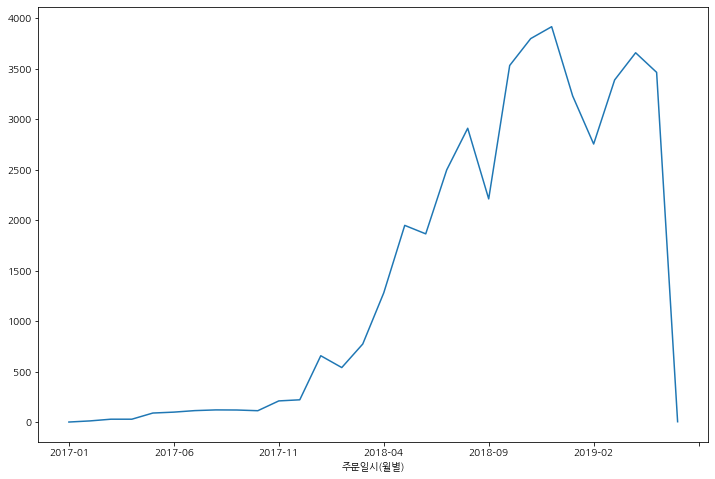

In [11]:
data['회원'].plot()

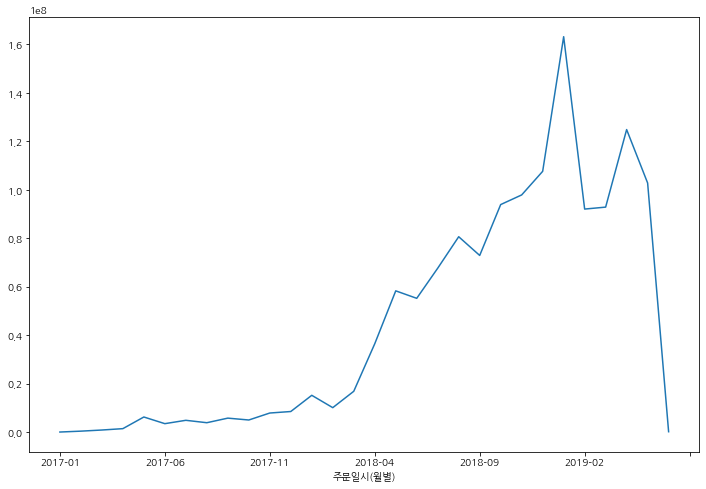

In [12]:
data['영업이익'].plot()

In [13]:
df_order['주문경로'].unique()

array(['PC쇼핑몰', '모바일웹', '네이버 페이'], dtype=object)

In [14]:
data1=df_order.groupby(by=['주문경로']).sum().groupby(level=[0]).cumsum()

data1['영업이익']=data1['상품구매금액']-data1['공급원가']-data1['사용한 적립금액']-data1['쿠폰 할인금액']

In [15]:
data1

,Unnamed: 0,공급원가,네이버 포인트,사용한 적립금액,상품구매금액,상품별 추가할인금액,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,영업이익
주문경로,,,,,,,,,,,,,,,
PC쇼핑몰,605021573,1.030734e+09,0,18457121,1756650465,223537840,7126470,1465132455,925453443,143.0,4941.0,25412.0,30292,13994323,700332720.0
네이버 페이,61983798,1.190260e+08,3512562,0,207980660,27839650,0,178464150,78428025,2.0,0.0,0.0,3057,2148597,88954703.0
모바일웹,425705755,7.561521e+08,0,21066680,1278260260,151809150,4477200,1075408040,729582663,83.0,3247.0,18232.0,21713,10720168,496564244.0


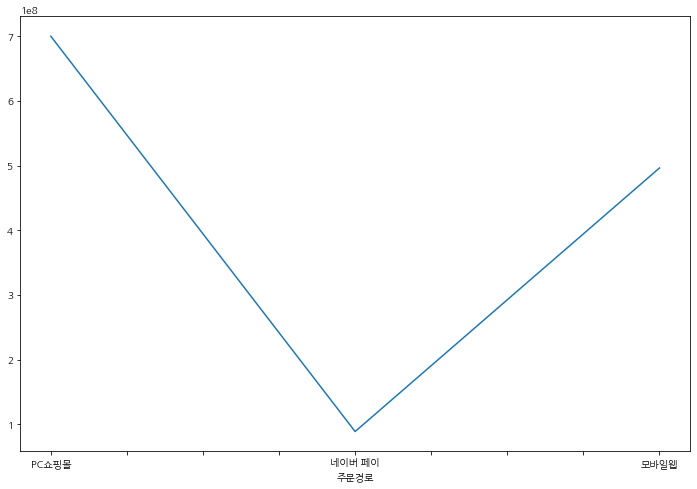

In [16]:
data1['영업이익'].plot()

In [17]:
df_order.columns


Index(['Unnamed: 0', '결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수령인 주소', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '친환경', '사은품', '회원', '주문수량', '총수량', '주문일시(월별)'], dtype='object')

In [18]:
len(data[data['상품별 추가할인금액']<0])

0

# 15. 시계열 분석을 통한 재고관리

In [19]:
df_order.columns

Index(['Unnamed: 0', '결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수령인 주소', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '친환경', '사은품', '회원', '주문수량', '총수량', '주문일시(월별)'], dtype='object')

In [20]:
df_order = pd.read_csv("modifed_log_order_with_category.csv")

In [21]:
df_order['주문일시(월별)']=df_order['주문일시'].str.slice(start=0,stop=7)

In [22]:
df_order["분류카테고리"].unique()

array(['용기', '기타', '실링제품', '식자재'], dtype=object)

In [23]:
df_order

,Unnamed: 0,Unnamed: 0.1,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수령인 주소,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,분류카테고리,주문일시(월별)
0,0,0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,71450,195파이 탕용기 소 300개 1set(2박스),1077.0,13600,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450,42602,False,False,True,1,300,용기,2018-12
1,1,1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42.0,19800,서울특별시 동대문구 한천로36길 16 (장안동),모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620,42930,False,False,True,2,2000,용기,2018-12
2,2,2,무통장입금,6820.0,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,13910,비닐봉투 배달중 중 백색 200개,1271.0,2900,세종특별자치시 호려울로 29 (보람동),모바일웹,20181230-0000100,2018-12-30 오후 3:15,NaN,기타,0,13910,42998,False,False,False,1,200,기타,2018-12
3,3,3,무통장입금,49500.0,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,81600,195파이 미니탕용기 투톤 300개 1set(2박스),1085.0,12630,부산광역시 부산진구 가야대로 482 (개금동),모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600,43063,False,False,True,1,300,용기,2018-12
4,5,5,무통장입금,42900.0,교환안함,0,D-20181231-0000108-01,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,75240,210파이 중화면용기 중 300개 1박스,1374.0,16430,부산광역시 해운대구 선수촌로 104-21 (반여동),모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,75240,43067,False,False,True,1,300,용기,2018-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29466,46787,46744,카드,36300.0,교환안함,0,D-20171229-0000036-00,무료,2017-12-29 오후 4:32,2018-01-02 오전 5:31,0,52800,PP 4칸 도시락용기 A 200개 1박스,445.0,6340,서울특별시 서초구 강남대로97길 23 (잠원동),모바일웹,20171229-0000036,2017-12-29 오후 1:39,73987748@n,국민,0,52800,3170,False,False,True,1,200,용기,2017-12
29467,46788,46745,카드,36300.0,교환안함,0,D-20171229-0000043-00,무료,2018-01-03 오전 9:45,2018-01-07 오전 5:38,0,112200,PP 6칸 도시락용기 02 200개 1박스,172.0,13460,경기도 의정부시 용민로 483 (민락동),모바일웹,20171229-0000043,2017-12-29 오후 5:16,chuheesuk,비씨,0,56100,3172,False,False,True,2,400,용기,2017-12
29468,46789,46746,카드,22280.0,교환안함,300,D-20171230-0000022-01,무료,2018-01-02 오후 7:06,2018-01-11 오전 2:46,0,36000,"170mm 수저 투명 1,500개 1박스",140.0,3600,대전광역시 서구 관저2동,네이버 페이,20171230-0000022,2017-12-30 오후 6:56,NaN,기타,0,36000,3177,False,False,False,1,1500,기타,2017-12
29469,46790,46747,카드,55000.0,교환안함,320,D-20171231-0000017-01,무료,2018-01-03 오후 2:00,2018-01-06 오후 6:06,0,73460,170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스),184.0,5140,광주광역시 서구 화운로 152 (화정동,네이버 페이,20171231-0000017,2017-12-31 오전 10:00,NaN,기타,0,73460,3178,False,False,False,1,400,용기,2017-12


In [24]:
df_용기재고 = df_order[df_order["분류카테고리"] == "용기"][["주문수량", "주문일시(월별)"]]

df_용기재고

,주문수량,주문일시(월별)
0,1,2018-12
1,2,2018-12
3,1,2018-12
4,1,2018-12
5,1,2018-12
...,...,...
29465,1,2017-12
29466,1,2017-12
29467,2,2017-12
29469,1,2017-12


In [25]:
df_기타재고 = df_order[df_order["분류카테고리"] == "기타"][["주문수량", "주문일시(월별)"]]
df_실링재고 = df_order[df_order["분류카테고리"] == "실링제품"][["주문수량", "주문일시(월별)"]]
df_식자재재고 = df_order[df_order["분류카테고리"] == "식자재"][["주문수량", "주문일시(월별)"]]

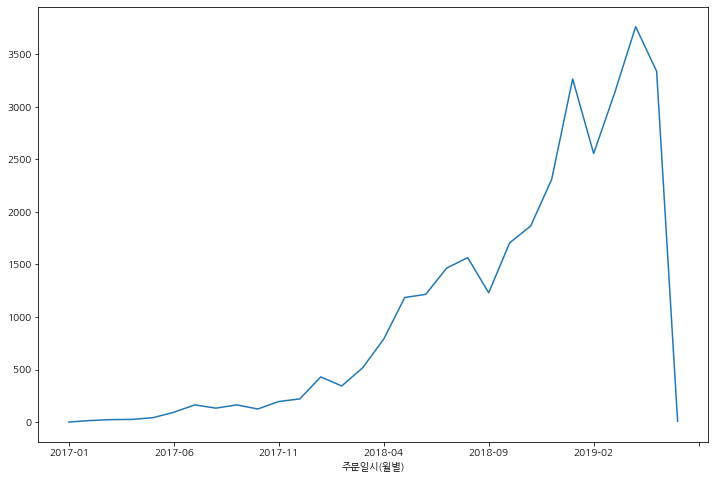

In [26]:
df_용기추이 = df_용기재고.groupby(by=['주문일시(월별)']).sum().groupby(level=[0]).sum()

df_용기추이["주문수량"].plot()

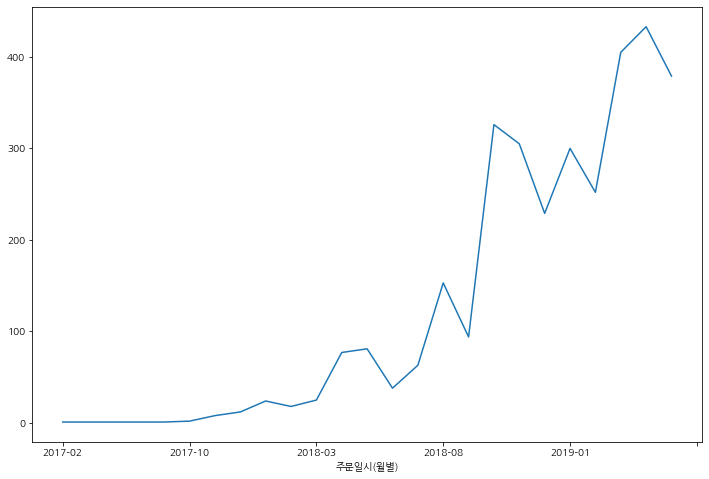

In [27]:
df_기타추이 = df_기타재고.groupby(by=['주문일시(월별)']).sum().groupby(level=[0]).sum()

df_기타추이["주문수량"].plot()

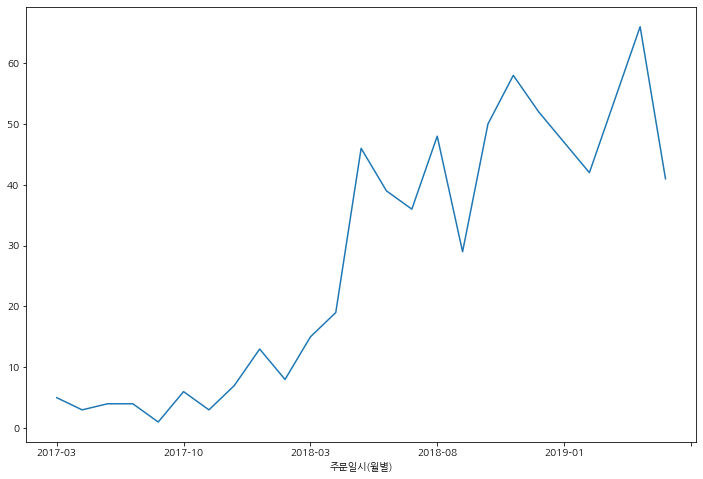

In [28]:
df_실링추이 = df_실링재고.groupby(by=['주문일시(월별)']).sum().groupby(level=[0]).sum()

df_실링추이["주문수량"].plot()

In [29]:
df_order

,Unnamed: 0,Unnamed: 0.1,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수령인 주소,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,분류카테고리,주문일시(월별)
0,0,0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,71450,195파이 탕용기 소 300개 1set(2박스),1077.0,13600,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450,42602,False,False,True,1,300,용기,2018-12
1,1,1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42.0,19800,서울특별시 동대문구 한천로36길 16 (장안동),모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620,42930,False,False,True,2,2000,용기,2018-12
2,2,2,무통장입금,6820.0,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,13910,비닐봉투 배달중 중 백색 200개,1271.0,2900,세종특별자치시 호려울로 29 (보람동),모바일웹,20181230-0000100,2018-12-30 오후 3:15,NaN,기타,0,13910,42998,False,False,False,1,200,기타,2018-12
3,3,3,무통장입금,49500.0,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,81600,195파이 미니탕용기 투톤 300개 1set(2박스),1085.0,12630,부산광역시 부산진구 가야대로 482 (개금동),모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600,43063,False,False,True,1,300,용기,2018-12
4,5,5,무통장입금,42900.0,교환안함,0,D-20181231-0000108-01,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,75240,210파이 중화면용기 중 300개 1박스,1374.0,16430,부산광역시 해운대구 선수촌로 104-21 (반여동),모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,75240,43067,False,False,True,1,300,용기,2018-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29466,46787,46744,카드,36300.0,교환안함,0,D-20171229-0000036-00,무료,2017-12-29 오후 4:32,2018-01-02 오전 5:31,0,52800,PP 4칸 도시락용기 A 200개 1박스,445.0,6340,서울특별시 서초구 강남대로97길 23 (잠원동),모바일웹,20171229-0000036,2017-12-29 오후 1:39,73987748@n,국민,0,52800,3170,False,False,True,1,200,용기,2017-12
29467,46788,46745,카드,36300.0,교환안함,0,D-20171229-0000043-00,무료,2018-01-03 오전 9:45,2018-01-07 오전 5:38,0,112200,PP 6칸 도시락용기 02 200개 1박스,172.0,13460,경기도 의정부시 용민로 483 (민락동),모바일웹,20171229-0000043,2017-12-29 오후 5:16,chuheesuk,비씨,0,56100,3172,False,False,True,2,400,용기,2017-12
29468,46789,46746,카드,22280.0,교환안함,300,D-20171230-0000022-01,무료,2018-01-02 오후 7:06,2018-01-11 오전 2:46,0,36000,"170mm 수저 투명 1,500개 1박스",140.0,3600,대전광역시 서구 관저2동,네이버 페이,20171230-0000022,2017-12-30 오후 6:56,NaN,기타,0,36000,3177,False,False,False,1,1500,기타,2017-12
29469,46790,46747,카드,55000.0,교환안함,320,D-20171231-0000017-01,무료,2018-01-03 오후 2:00,2018-01-06 오후 6:06,0,73460,170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스),184.0,5140,광주광역시 서구 화운로 152 (화정동,네이버 페이,20171231-0000017,2017-12-31 오전 10:00,NaN,기타,0,73460,3178,False,False,False,1,400,용기,2017-12
